In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/commonlitreadabilityprize/sample_submission.csv
/kaggle/input/commonlitreadabilityprize/train.csv
/kaggle/input/commonlitreadabilityprize/test.csv


In [2]:
# load the training data
train_data = pd.read_csv('/kaggle/input/commonlitreadabilityprize/train.csv')
train_data.drop(['url_legal', 'license', 'standard_error'], axis=1, inplace=True)
train_data.head(3)

,id,excerpt,target
0,c12129c31,When the young people returned to the ballroom...,-0.340259
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118


In [3]:
# load the testing data
test_data = pd.read_csv('/kaggle/input/commonlitreadabilityprize/test.csv')
test_data.drop(['url_legal', 'license'], axis=1, inplace=True)
print(test_data.shape)
test_data.head(1)

(7, 2)


,id,excerpt
0,c0f722661,My hope lay in Jack's promise that he would ke...


In [4]:
# define X, y and test
X_train = train_data.excerpt
Y_train = train_data.target
final_test = test_data.excerpt

In [5]:
# split the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.20)
x_train = np.array(x_train)
x_val = np.array(x_val)
y_train = np.array(y_train) #y_train
y_val = np.array(y_val) #y_test
final_test = np.array(final_test)
X_full = np.array(X_train)
Y_full = np.array(Y_train) #y_full

In [6]:
# vectorize the training and testing excerpt (text) columns 
from sklearn.feature_extraction.text import TfidfVectorizer
# intializes the vectorizer to remove english stop words, maximum 10000 features and remove accents and perform other character normalization
vectorizer = TfidfVectorizer(lowercase=True, analyzer='word', stop_words='english', max_features=10, strip_accents='unicode')
x_train_vector = vectorizer.fit_transform (x_train).toarray() #train_vector
x_val_vector = vectorizer.fit_transform (x_val).toarray() #test_vectors
x_full = vectorizer.fit_transform (X_full).toarray() #vectors_full
final_test_vector = vectorizer.transform (final_test).toarray() #real_test_vectors
print(x_train_vector[0])
print(x_train_vector.shape, y_train.shape)
print(x_val_vector.shape, y_val.shape)
print(final_test_vector.shape)

[0.         0.73835288 0.         0.         0.67441458 0.
 0.         0.         0.         0.        ]
(2267, 10) (2267,)
(567, 10) (567,)
(7, 10)


In [7]:
pd.DataFrame(x_train_vector,columns=vectorizer.get_feature_names())

,called,day,great,like,little,old,people,said,time,water
0,0.000000,0.738353,0.000000,0.0,0.674415,0.0,0.000000,0.000000,0.00000,0.0
1,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0
2,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...
2262,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0
2263,0.000000,0.000000,0.525683,0.0,0.473178,0.0,0.540899,0.000000,0.45518,0.0
2264,0.210548,0.000000,0.212106,0.0,0.000000,0.0,0.872981,0.385468,0.00000,0.0
2265,0.000000,0.441988,0.897021,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0


In [8]:
from sklearn.neural_network import MLPRegressor


In [9]:
regr = MLPRegressor(hidden_layer_sizes=(512,1024,512))

In [10]:
regr.fit(x_train_vector, y_train)

MLPRegressor(hidden_layer_sizes=(512, 1024, 512))

## Step: Export model after training

In [11]:
import joblib

joblibFile = "linearRegressorModel.joblib"
joblib.dump(regr, joblibFile)

['linearRegressorModel.joblib']

In [12]:
x_train_vector.shape

(2267, 10)

In [13]:
y_train.shape

(2267,)

In [14]:
regr.score(x_train_vector, y_train)

0.37918220336871533

In [15]:
x_val_vector.shape

(567, 10)

In [16]:
y_val.shape

(567,)

In [17]:
regr.score(x_val_vector, y_val)

-0.12229443569090503

In [18]:
training_preds = regr.predict(x_train_vector)
training_preds

array([-0.55368249, -1.65851093, -1.03231357, ...,  0.03165655,
        0.4775884 , -0.16324507])

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

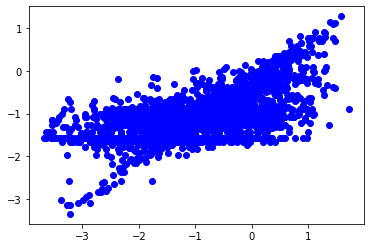

In [20]:
plt.plot(y_train, training_preds, 'bo')

In [21]:
val_preds = regr.predict(x_val_vector)
val_preds

array([-0.27245208,  0.61145299, -0.96768055, -1.26050413, -0.16239376,
       -1.45095857, -1.58231237, -1.65851093, -1.58231237, -0.24157224,
       -1.58231237, -1.09056718,  0.16882742, -0.74053374, -0.44346799,
       -1.52573195, -2.25025724, -1.65851093, -0.60254282, -1.37399809,
       -1.77607392, -0.86729779, -1.0747614 , -0.18088963, -0.67900006,
       -1.53599572, -1.91721332, -1.58231237, -0.99832749, -0.76889672,
       -1.52937936, -0.41559269, -1.07600236, -1.42182231, -1.65851093,
       -1.07082272, -1.26759972, -1.58231237, -1.14609254, -1.65851093,
       -1.26050413, -1.07600236, -1.66597579, -0.42231946,  0.53116929,
        0.06925486, -1.42182231, -1.58231237, -1.58231237, -1.58231237,
       -0.59382253, -0.69634084, -1.08330067, -1.00936926, -1.58231237,
       -1.22641468, -1.14609254, -1.02978316, -1.58231237, -1.23078159,
       -1.03231357, -1.30637156, -1.58231237, -1.03231357, -1.26050413,
       -1.0747614 , -1.35750104, -0.46858179, -1.65851093, -1.58

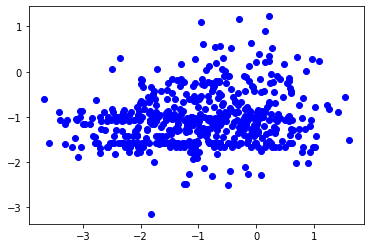

In [22]:
plt.plot(y_val, val_preds, 'bo')

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,training_preds)

0.6651612908497689

In [24]:
regr.fit(x_full, Y_full)

MLPRegressor(hidden_layer_sizes=(512, 1024, 512))

In [25]:
test_preds = regr.predict(final_test_vector)
test_preds

array([-0.96951942, -1.31889947, -0.42994527, -1.52771043, -1.52771043,
       -1.52771043, -0.88499079])

In [26]:
# create submission file
submission = pd.DataFrame({'id' : test_data['id'], 'target' : test_preds})
submission.to_csv('/kaggle/working/submission.csv', index=False)
submission.head(7)

,id,target
0,c0f722661,-0.969519
1,f0953f0a5,-1.318899
2,0df072751,-0.429945
3,04caf4e0c,-1.527710
4,0e63f8bea,-1.527710
5,12537fe78,-1.527710
6,965e592c0,-0.884991
